<a href="https://colab.research.google.com/github/kcw0331/Deeplearning/blob/main/%EC%83%88%ED%8F%B4%EB%8D%941/2021%EB%85%84%EA%B0%80%EC%9D%84_%EB%94%A5%EB%9F%AC%EB%8B%9D_(%EA%B9%80%EC%B0%BD%EC%9A%B0_%EB%8B%A4%EC%8B%9C%ED%91%BC%EA%B2%83).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.keras.__version__

'2.8.0'

데이터 읽어오기.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
train_labels.shape

(60000, 10)

(1) [20점] 아래의 그림과 같은 구조를 가지는 CNN 모형을 작성해 봅시다. 

#![image.png](attachment:image.png)
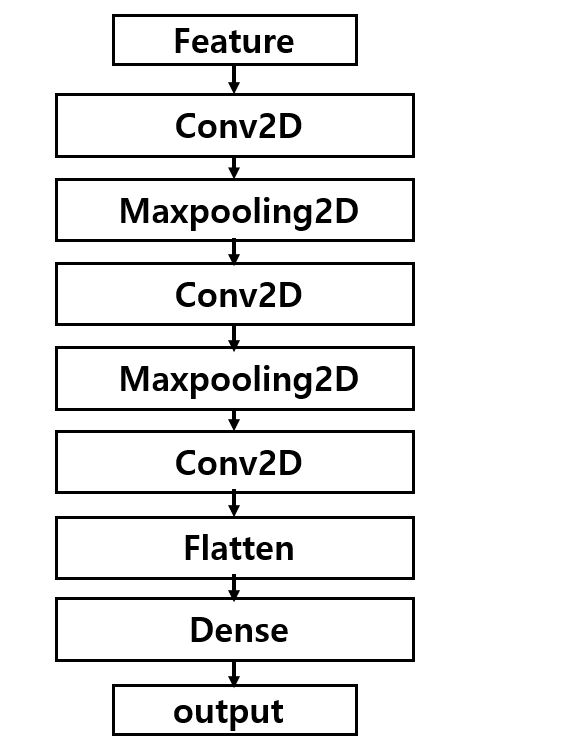
- Convolution layer 의 필터 갯수는 각각 16, 32, 32개로 설정하세요
- 모든 Convolution layer 에서 커널 크기는 모두 (3,3) 으로 설정하고, zero padding을 적용하고. stride 는 1칸씩 진행되도록 합니다.
- 모든 Convolution layer 에서 activation 은 'relu'를 사용합니다.
- Maxpooling 은 가로 세로 2칸씩 적용하도록 하고, stride 역시 2칸씩 진행합니다.
- Flatten layer 이후의 Dense layer 의 필터 갯수는 50으로 하고, activation은 'relu'함수를 사용합니다. 


In [ ]:
#2022년 3월 24일에 다시 푼것
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(16, (3,3), padding = 'same', strides=(1,1),activation='relu', input_shape = (28,28,1)))
model1.add(layers.MaxPool2D((2,2), strides = (2,2)))
model1.add(layers.Conv2D(32, (3,3), padding = 'same', strides=(1,1),activation='relu'))
model1.add(layers.MaxPool2D((2,2), strides = (2,2)))
model1.add(layers.Conv2D(32, (3,3), padding = 'same', strides=(1,1),activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(50, activation = 'relu'))
model1.add(layers.Dense(10, activation = 'softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

In [ ]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model1.fit(x_train, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1576 - accuracy: 0.9511
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0494 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0225 - accuracy: 0.9927


In [ ]:
### Define your model here
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras

model1 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(16, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.Flatten(),
        layers.Dense(50, activation= 'relu'),
        layers.Dense(10, activation="softmax"),
    ]
)

model1.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 flatten_13 (Flatten)        (None, 1568)            

(2) [20점] 아래와 같이 모형을 컴파일하고 훈련을 수행해보세요.  
 - optimizer 로는 Adam optimizer 사용
 - loss는 categorical cross entropy를 사용
 - 모형 평가 metric 으로 accuracy를 사용
 - 훈련에 있어서 epoch=5, batch size 는 32를 사용 

In [ ]:
## compile your model with model.compile()
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
## fit your model with model.fit()
model1.fit(x_train, train_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 6ms/step - loss: 0.1494 - accuracy: 0.9521
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0197 - accuracy: 0.9939


(3) [30점] Data Augmentation 을 적용하여 훈련을 시켜보세요. 

- Data Augmentation 으로 RandomFlip 을 가로, 세로방향을 적용하고, RandomRotation을 시계방향 반시계방향으로 30도 정도 회전을 적용합니다. 
- Tensorflow data api를 사용하면 조금 더 편한 것 같습니다. (안사용해도 괜찮습니다)

In [ ]:
#2022년 3월 24일 
from keras import layers
from keras import models

model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3,3), padding = 'same', strides=(1,1),activation='relu', input_shape = (28,28,1)))
model2.add(layers.MaxPool2D((2,2), strides = (2,2)))
model2.add(layers.Conv2D(32, (3,3), padding = 'same', strides=(1,1),activation='relu'))
model2.add(layers.MaxPool2D((2,2), strides = (2,2)))
model2.add(layers.Conv2D(32, (3,3), padding = 'same', strides=(1,1),activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(50, activation = 'relu'))
model2.add(layers.Dense(10, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2 ,rotation_range=30)

datagen.fit(x_train)

model2.fit_generator(datagen.flow(x_train, train_labels, batch_size=32), epochs=5)

#model2.fit(flow_tr_gen, epochs = 20)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1875/1875 [==============================] - 31s 15ms/step - loss: 0.4871 - accuracy: 0.8412
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1700 - accuracy: 0.9467
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1282 - accuracy: 0.9601
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1093 - accuracy: 0.9665
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0957 - accuracy: 0.9699


# 여기는 Tensorflow 방법으로 시도해본 것이다.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.3),
])

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras

model2 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        data_augmentation,
        layers.Conv2D(16, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.Flatten(),
        layers.Dense(50, activation= 'relu'),
        layers.Dense(10, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)         

In [ ]:
## compile your model with model.compile()
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
## fit your model with model.fit()
model2.fit(x_train, train_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7952 - accuracy: 0.7324
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3947 - accuracy: 0.8729
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3114 - accuracy: 0.8998
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2689 - accuracy: 0.9123
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2437 - accuracy: 0.9205


(4) [30점] 5이상의 숫자(5,6,7,8,9)와 5미만의 숫자(0,1,2,3,4)를 판별하는 모형을 만들고 싶습니다. 아래의 작업들을 수행하세요.

- 5이상의 숫자를 0, 5미만의 숫자를 1로 하는 train_y_5, test_y_5 변수들을 만듭니다.
- (2) 또는 (3)에서 적합시킨 pre-trained network 을 가져와서 transefer learning 을 적용해서 5이상의 숫자와 5미만 숫자를 판별하는 모형을 만들어보세요.   
  - pre-trained network을 가져와서 마지막 layer 를 해당 문제에 맞게 수정해야 합니다.
  - fine-tuning 을 적용합니다. 마지막 Dense(50) Lyaer 를 trainable 하게하고, 그 상위 CNN 레이어 들은 Freeze 시킨 후 트레이닝 해보세요. 

In [ ]:
#2022년 3월 24일 
train_y_5 =[]
for i in y_train:
  if i >= 5:
    train_y_5.append(0)
  else:
    train_y_5.append(1)

In [ ]:
test_y_5 = []
for i in y_test:
  if i >= 5:
    test_y_5.append(0)
  else:
    test_y_5.append(1)

In [ ]:
import numpy as np
train_y_5 = np.array(train_y_5)
test_y_5 = np.array(test_y_5)

In [ ]:
train_y_5_labels = to_categorical(train_y_5)
test_y_5_labels = to_categorical(test_y_5)

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

In [ ]:
from keras import layers
from keras import models

model3 = models.Sequential()
model3.add(model1)
model3.add(layers.Flatten())
model3.add(layers.Dense(2, activation = 'softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10)                93008     
                                                                 
 flatten_5 (Flatten)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                                 
Total params: 93,030
Trainable params: 78,982
Non-trainable params: 14,048
_________________________________________________________________


In [ ]:
model1.trainable = True

set_trainable = False
for layer in model1.layers:
  if layer.name == 'dense_4':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model3.fit(x_train, train_y_5_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1913 - accuracy: 0.9798
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0425 - accuracy: 0.9960
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0231 - accuracy: 0.9964
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0164 - accuracy: 0.9969
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0131 - accuracy: 0.9974


In [ ]:
model3.evaluate(x_test, test_y_5_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9934


[0.03236033767461777, 0.993399977684021]

In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
train_y_5 = []
for i in y_train:
  if i < 5:
    train_y_5.append(1)
  elif i >= 5:
    train_y_5.append(0)

In [ ]:
test_y_5 = []
for i in y_test:
  if i < 5:
    test_y_5.append(1)
  elif i >= 5:
    test_y_5.append(0)

In [ ]:
import numpy as np
train_y_5 = np.array(train_y_5)
test_y_5 = np.array(test_y_5)

In [ ]:
train_labels_5 = to_categorical(train_y_5)
test_labels_5 = to_categorical(test_y_5)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras

model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(16, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"),
        layers.Flatten(),
        layers.Dense(50, activation= 'relu'),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 flatten_5 (Flatten)         (None, 1568)             

In [ ]:
model.layers[5]

In [ ]:
for i in model.layers[:6]:
  i.trainable = False

In [ ]:
trans_model = keras.Sequential(model.layers[:7])
trans_model.add(layers.Dense(2, activation= 'softmax'))

trans_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
trans_model.fit(x_train, train_labels_5, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2008 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1015 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0836 - accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0734 - accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9774


# 여기부분에 다시 만들어 보았다.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model3 = models.Sequential()
model3.add(layers.Conv2D(16, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu", input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model3.add(layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model3.add(layers.Conv2D(32, kernel_size=(3, 3), padding = "same", strides = (1, 1), activation="relu"))
model3.add(layers.Flatten())
model3.add(layers.Dense(50, activation= 'relu'))
model3.add(layers.Dense(10, activation="softmax"))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers



model4 = models.Sequential()
model4.add(model3)
model4.add(layers.Flatten())
model4.add(layers.Dense(10, activation='relu'))
model4.add(layers.Dense(2, activation='softmax'))


In [ ]:
model4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 10)                93008     
                                                                 
 flatten_17 (Flatten)        (None, 10)                0         
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 2)                 22        
                                                                 
Total params: 93,140
Trainable params: 79,092
Non-trainable params: 14,048
_________________________________________________________________


In [ ]:
print(len(model4.trainable_weights))

8


In [ ]:
model3.trainable = False

In [ ]:
print(len(model4.trainable_weights))

4


In [ ]:
model3.trainable = True

set_trainable = False
for layer in model3.layers:
  if layer.name == 'dense_28':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.fit(x_train, train_labels_5, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1312 - accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0695 - accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0551 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459 - accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0400 - accuracy: 0.9861


# 석사 논문 자격시험 (파이썬을 이용한 딥러닝)

- 이름:  김창우
- 학번:  2020220071

------------------------------------------

colab을 사용할 경우 시험시작전에 꼭 Runtime tab을 클릭하고, Runtime - Change runtime type 을 클릭 후 Hardware accelerator 를 gpu로 설정해주세요.


다음은 mnist 데이터를 활용한 CNN 모형에 관련된 문제입니다. 코드를 완성해주세요.